In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler

In [24]:
df=pd.read_csv("Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [26]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


#### EDA

#### Encoding Categorical Labels

In [27]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Education Level"]=le.fit_transform(df["Education Level"])
df["Job Title"]=le.fit_transform(df["Job Title"])

In [28]:
df["Gender"]

0      1
1      0
2      1
3      0
4      1
      ..
370    0
371    1
372    0
373    1
374    0
Name: Gender, Length: 375, dtype: int64

<Axes: >

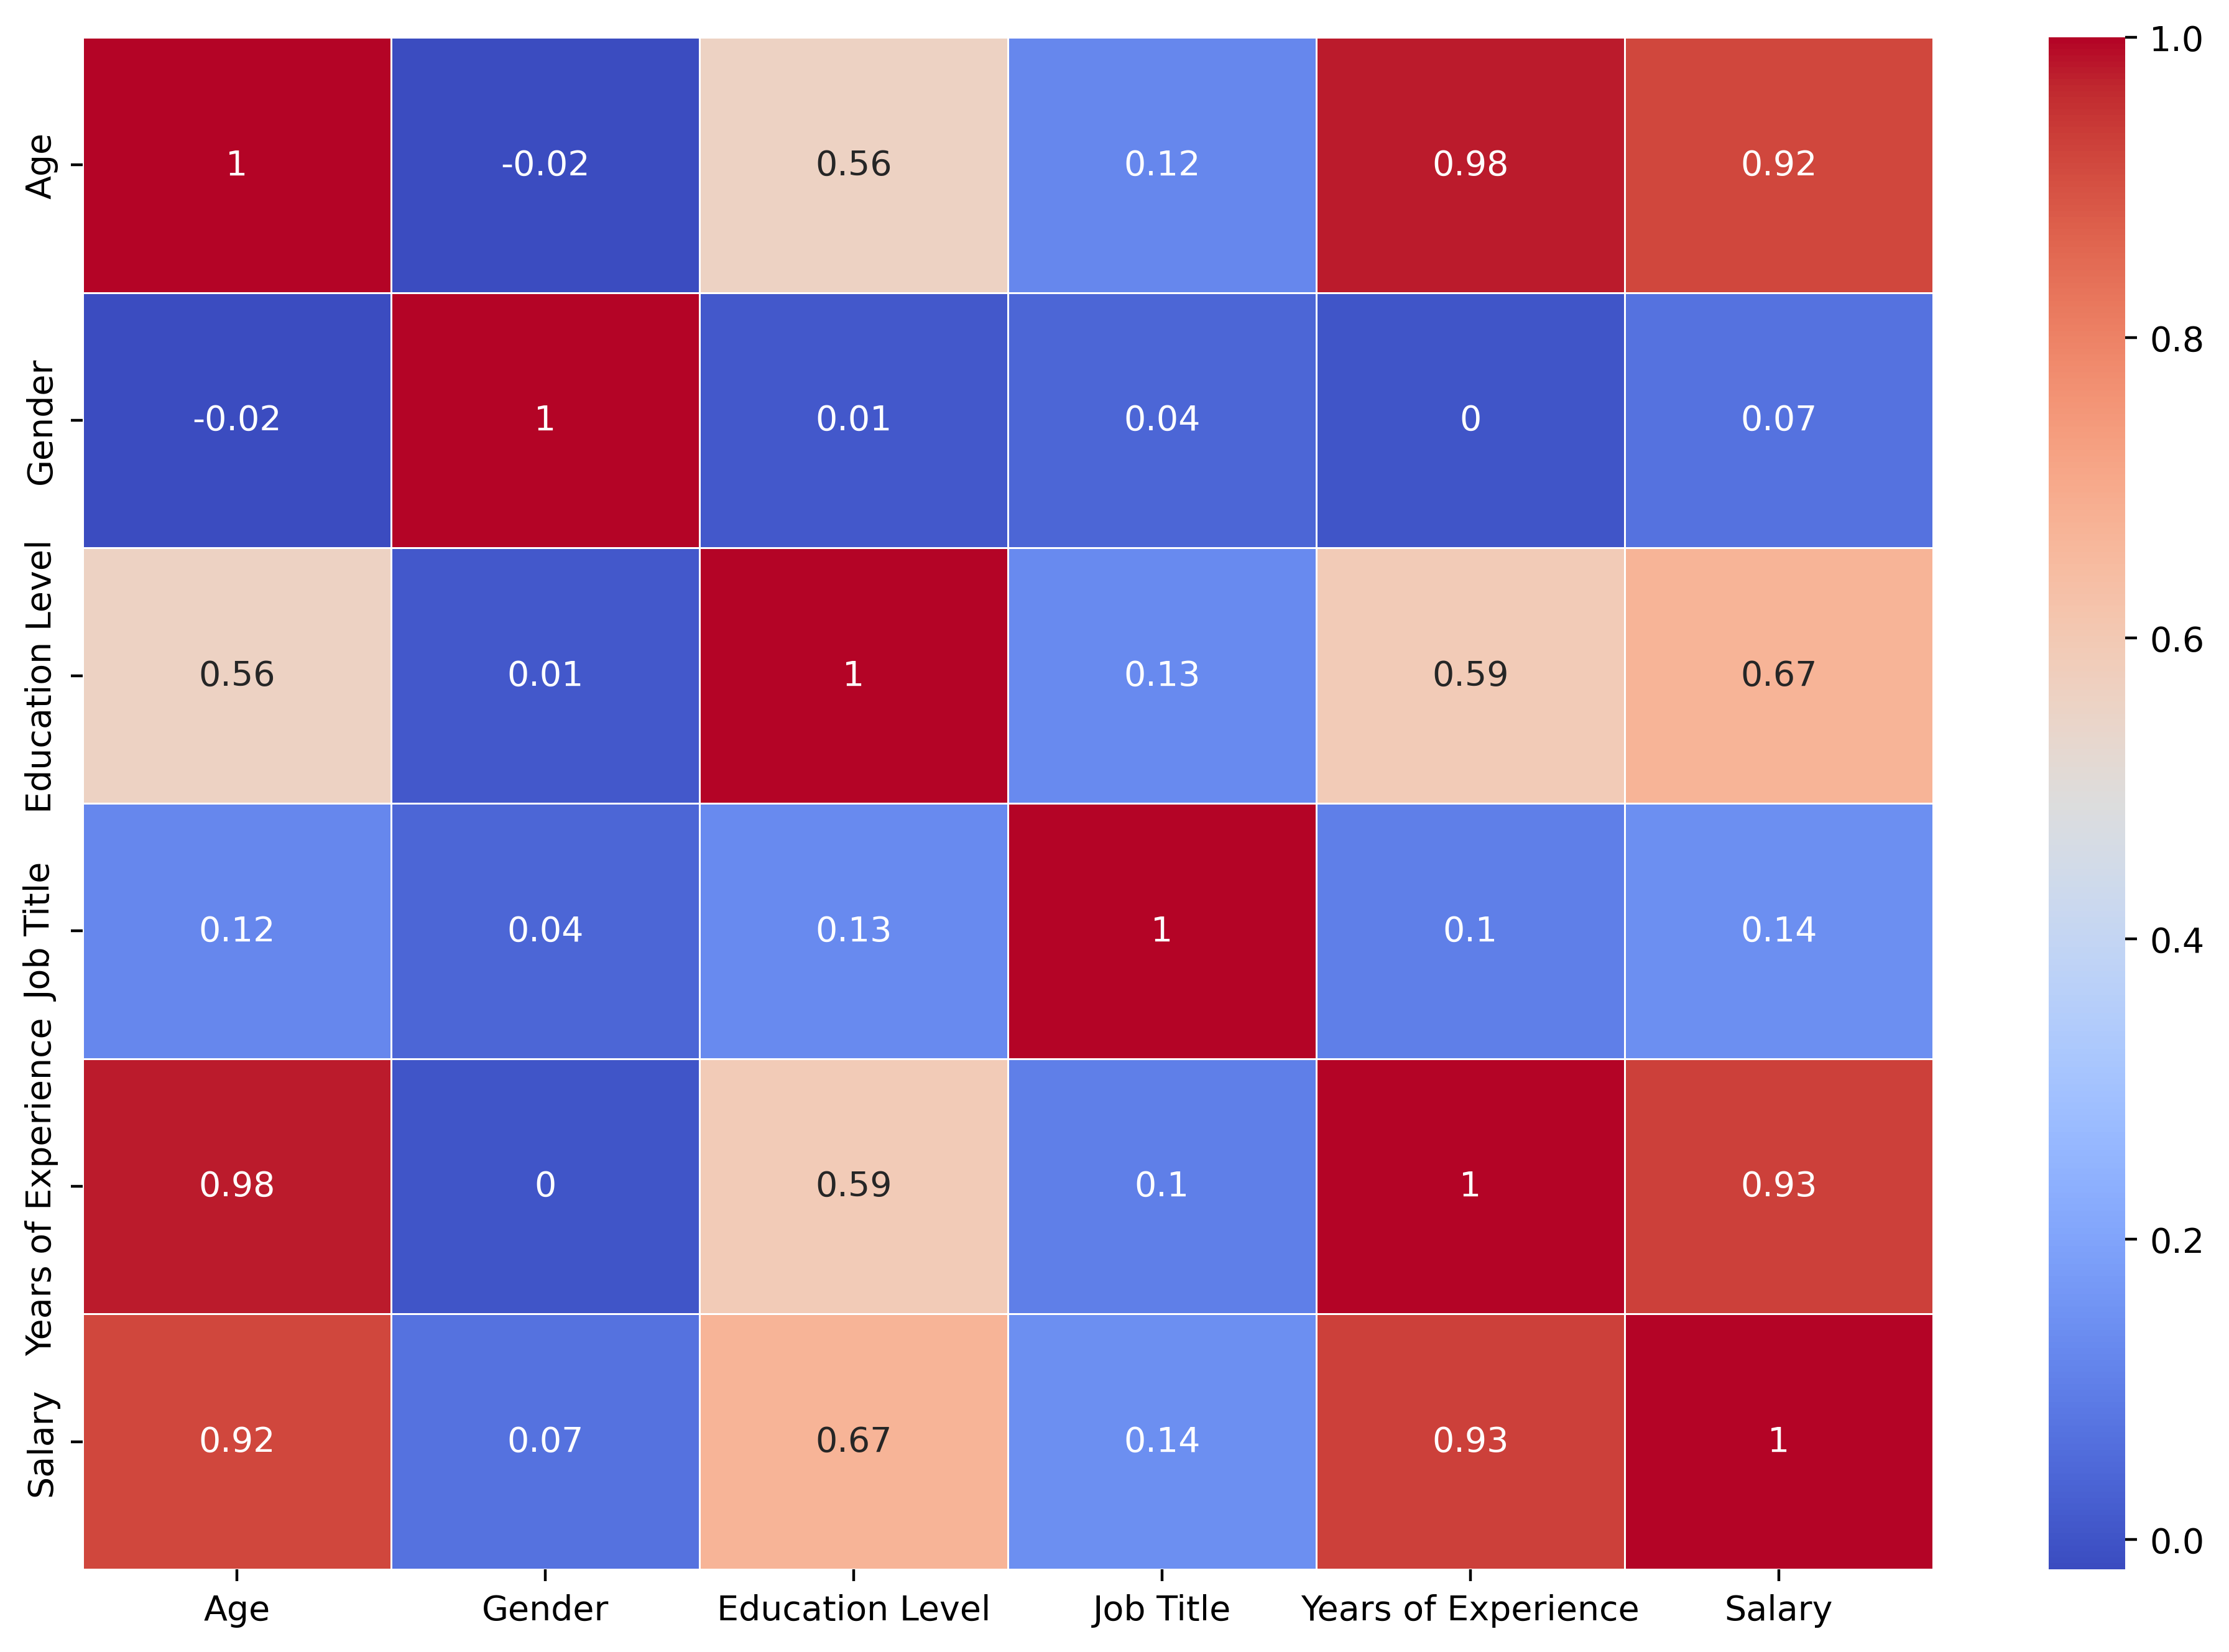

In [29]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

#### A strong correlation between Age and Salary can be found according to the heat map with a correlation coefficient of 0.92. Additionally, the correlation between Years of experience and Age is 0.93, indicating a strong correlation.

In [31]:
print(min(df["Age"]))
print(max(df["Age"]))

23.0
53.0


In [32]:
print(min(df["Years of Experience"]))
print(max(df["Years of Experience"]))

0.0
25.0


In [33]:
print(min(df["Job Title"]))
print(max(df["Job Title"]))

0
174


In [34]:
print(min(df["Salary"]))
print(max(df["Salary"]))

350.0
250000.0


In [36]:
scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: >

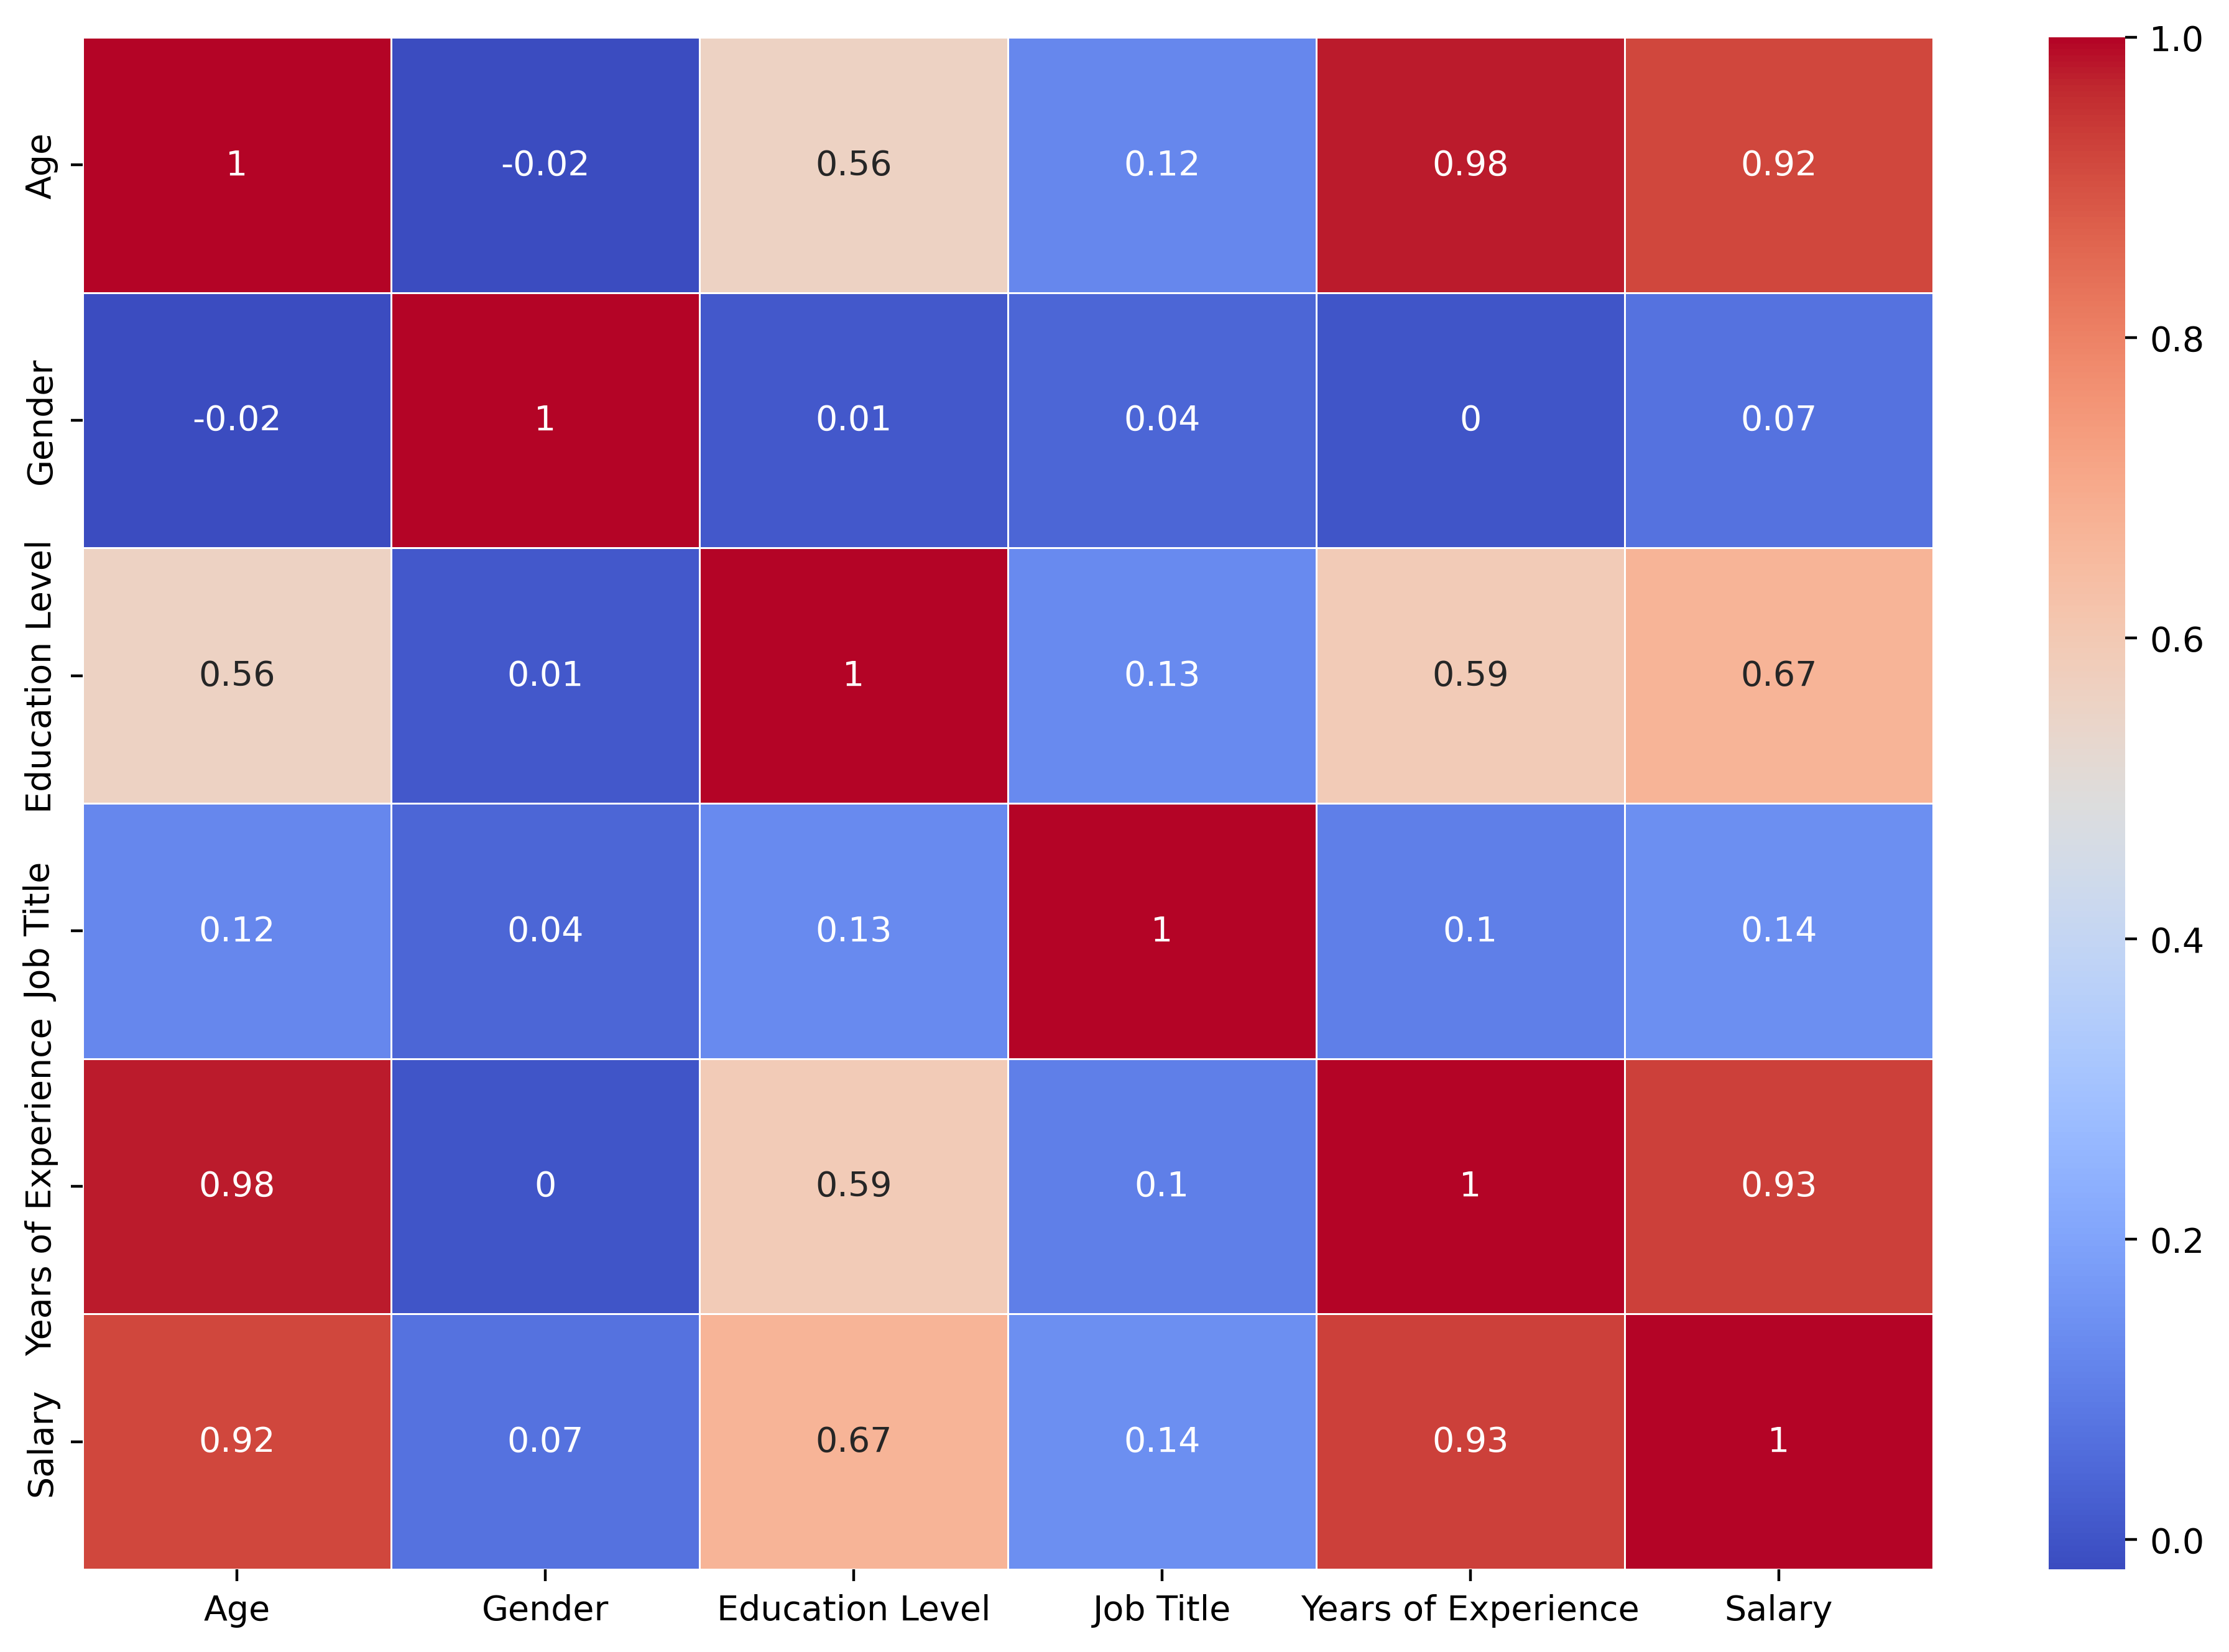

In [37]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: ylabel='Age'>

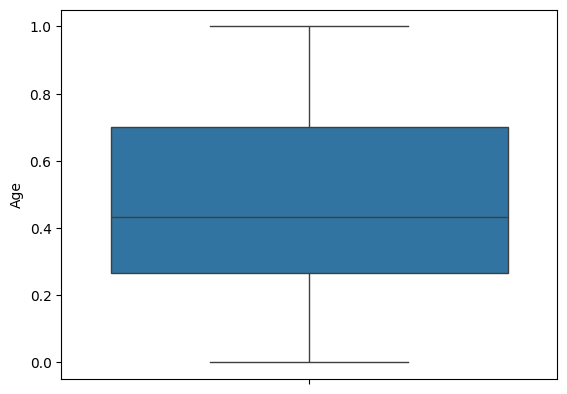

In [38]:
sns.boxplot(df["Age"])

<Axes: ylabel='Years of Experience'>

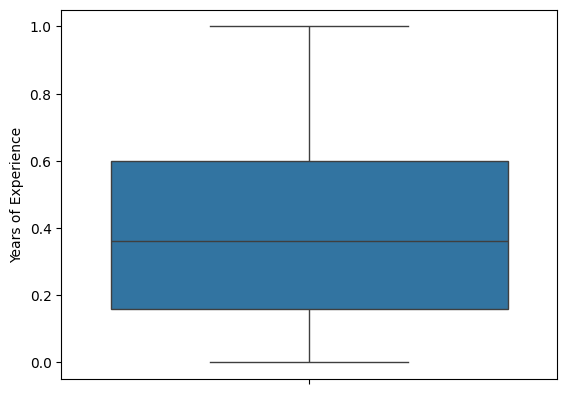

In [39]:
sns.boxplot(df["Years of Experience"])

<Axes: ylabel='Salary'>

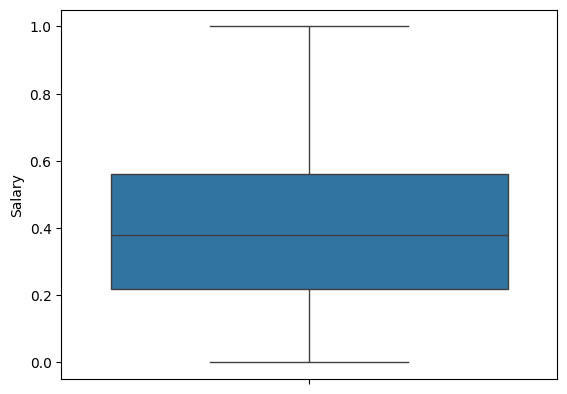

In [40]:
sns.boxplot(df["Salary"])